# SECTION A [BATCH 1]
# WEEK 5
# Exercise 1

**Used Resources:**

**1.)https://www.analyticsvidhya.com/blog/2021/06/predictive-modelling-rain-prediction-in-australia-with-python/** \
**2.)https://www.youtube.com/watch?v=qk7M749HKBs** \
**3.)**

# Consider the dataset 'weatherAUS' called Rain in Australia. It describes the weather characteristics on different dates and locations. This dataset contains about 10 years of daily weather observations from many locations across Australia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# 1.Preprocess the data, remove the attributes which were are not useful to predict rain. Also, remove rows with at least one missing value for each of them.

In [5]:
df.describe(exclude = [object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.describe(include = [object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2015-01-20,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [7]:
# Preprocessing the Data:

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
# Categorical features in Dataset:

categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)), '\n')
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7 

Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# Numerical Features in Dataset:

numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)), '\n')
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16 

Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
# Feature Engineering of Date column to decrease high cardinality:

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [11]:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [12]:
# Dropping rows which contain atleast one missing value: 

df.dropna(inplace = True)

In [13]:
# Categorical features in Dataset after dropping 'Date' column:

df.drop('Location', axis = 1, inplace = True) 
# Dropping location since it is not neccessary for prediction(See correlation matrix before dropping Location)

categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)), '\n')
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 5 

Categorical Features:  ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [14]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


In [15]:
# Cross checking whether the null values are dropped:

df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [16]:
df.shape

(56420, 24)

In [17]:
# Checking Cardinality(no. of unique values) for catrgorical features:

for each_feature in categorical_features:
    unique_values = len(df[each_feature].unique())
    print("Cardinality of '{}' are: {}".format(each_feature, unique_values))

Cardinality of 'WindGustDir' are: 16
Cardinality of 'WindDir9am' are: 16
Cardinality of 'WindDir3pm' are: 16
Cardinality of 'RainToday' are: 2
Cardinality of 'RainTomorrow' are: 2


In [18]:
# Feature Encoding(Encoding of Categorical Features):

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [19]:
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict


df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

#df['Location'].replace(encode_data('Location'), inplace = True)

In [20]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,17.9,35.2,0.0,12.0,12.3,0,48.0,0,0,6.0,...,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1,1
6050,18.4,28.9,0.0,14.8,13.0,1,37.0,1,1,19.0,...,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1,2
6052,19.4,37.6,0.0,10.8,10.6,2,46.0,2,2,30.0,...,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1,4
6053,21.9,38.4,0.0,11.4,12.2,3,31.0,3,3,6.0,...,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1,5
6054,24.2,41.0,0.0,11.2,8.4,3,35.0,4,4,17.0,...,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1,6


In [21]:
df.shape

(56420, 24)

# 2.Calculate the Variance Inflation Factor (VIF) value. VIF is a number that determines whether a variable has multicollinearity or not (starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it) 

In [22]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(X):
    
    vif_df = pd.DataFrame()

    vif_df['Feature'] = X.columns

    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return(vif_df)

In [25]:
initial_vif_df = get_vif(x)
initial_vif_df

,Feature,VIF
0,MinTemp,59.615971
1,MaxTemp,614.820148
2,Rainfall,1.629246
3,Evaporation,7.248055
4,Sunshine,17.497318
5,WindGustDir,3.757421
6,WindGustSpeed,30.073308
7,WindDir9am,3.743688
8,WindDir3pm,3.657261
9,WindSpeed9am,8.481613


# 3.Remove multicollinearities by creating new features. Find the features that have paired values and create the new feature which is the difference value between those pairs

In [26]:


temp = numerical_features #+ categorical_features  
temp_df = pd.DataFrame(df[temp])

In [27]:
corr_mat = temp_df.corr()
corr_mat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245


<AxesSubplot:>

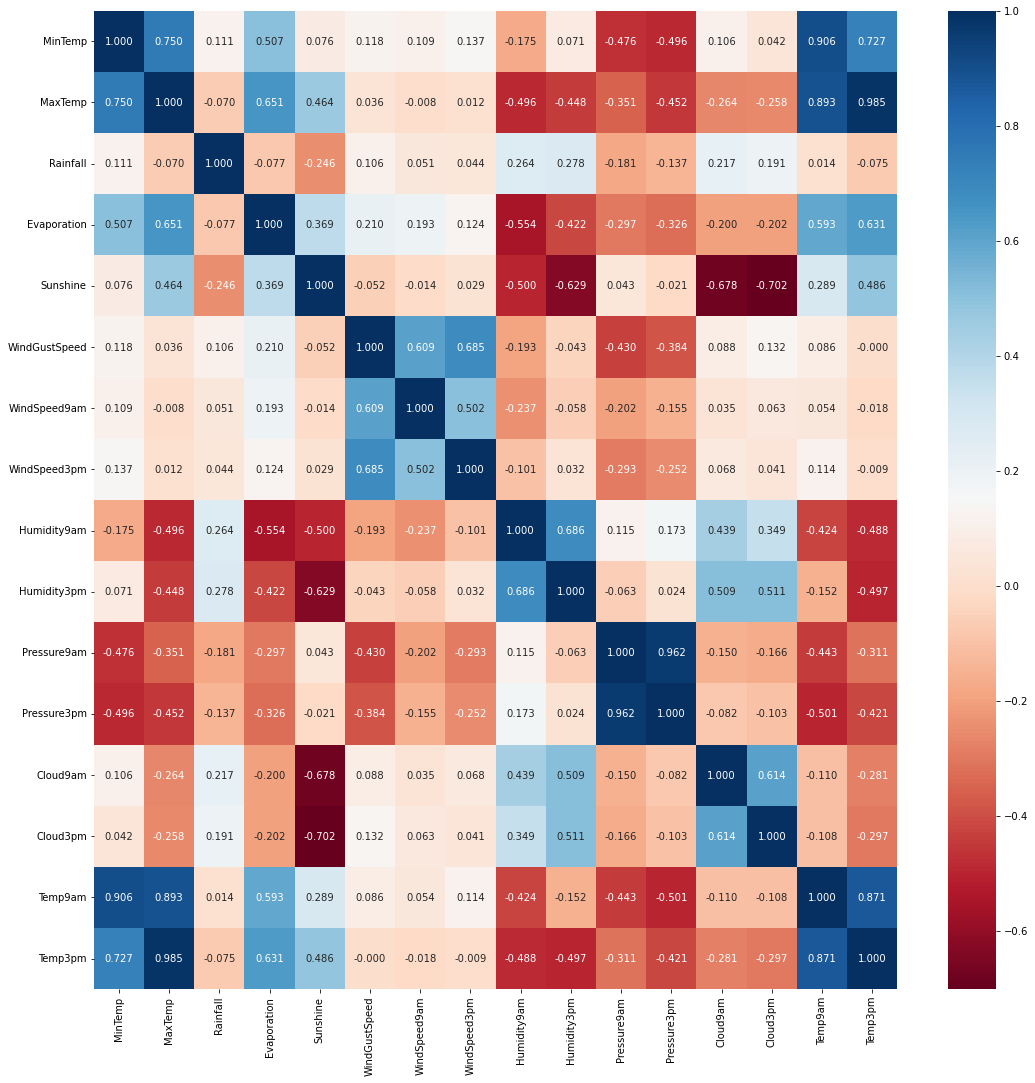

In [28]:
plt.figure(figsize = (18, 18))
sb.heatmap(corr_mat, annot = True, cmap = 'RdBu', fmt='.3f')

In [29]:
# Retrieving the pairs with Multicollinearity(correlation coeff > +0.9 and correlation coeff < -0.9):

corr_mat.unstack.sort_values(ascending = False)

AttributeError: 'function' object has no attribute 'sort_values'

In [30]:
temp2 = numerical_features + categorical_features
df2 = pd.DataFrame(df[temp])

In [31]:
# Combining/pairing features and creating new features which is the difference value between those pairs:

df3 = df2.copy()

df3['Morning Temp'] = df2.apply(lambda x: max(x['Temp9am'], x['MinTemp']) - min(x['Temp9am'], x['MinTemp']), axis = 1)
df3['Afternoon Temp'] = df2.apply(lambda x: max(x['Temp3pm'], x['MaxTemp']) - min(x['Temp3pm'], x['MaxTemp']), axis = 1)
df3['Pressure Increase in Day'] = df2.apply(lambda x: max(x['Pressure9am'], x['Pressure3pm']) - min(x['Pressure9am'], x['Pressure3pm']), axis = 1)

df4 = df3.drop(['Temp9am', 'MinTemp', 'Temp3pm', 'MaxTemp', 'Pressure9am', 'Pressure3pm'], axis = 1)

In [32]:
df4.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Morning Temp,Afternoon Temp,Pressure Increase in Day
6049,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,2.0,5.0,8.7,1.8,1.9
6050,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1.0,1.0,1.9,1.9,0.8
6052,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1.0,6.0,9.3,2.7,3.1
6053,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1.0,5.0,7.2,2.8,3.6
6054,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1.0,6.0,9.4,3.4,3.3


# 4.Remove features that have a VIF value above 5

In [34]:
final_vif_df = get_vif(df4)
final_vif_df

,Feature,VIF
0,Rainfall,1.231359
1,Evaporation,4.811881
2,Sunshine,12.507819
3,WindGustSpeed,25.209638
4,WindSpeed9am,7.889517
5,WindSpeed3pm,12.987529
6,Humidity9am,28.196562
7,Humidity3pm,20.598385
8,Cloud9am,6.868953
9,Cloud3pm,7.934619


In [38]:
drop_feature = final_vif_df[final_vif_df['VIF'] > 5]['Feature']
drop_feature

2          Sunshine
3     WindGustSpeed
4      WindSpeed9am
5      WindSpeed3pm
6       Humidity9am
7       Humidity3pm
8          Cloud9am
9          Cloud3pm
10     Morning Temp
Name: Feature, dtype: object

In [40]:
df4.drop( ['Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'
,'Morning Temp'], axis = 1, inplace = True)

In [46]:
df4

,Rainfall,Evaporation,Afternoon Temp,Pressure Increase in Day
6049,0.0,12.0,1.8,1.9
6050,0.0,14.8,1.9,0.8
6052,0.0,10.8,2.7,3.1
6053,0.0,11.4,2.8,3.6
6054,0.0,11.2,3.4,3.3
...,...,...,...,...
142298,0.0,6.0,1.1,3.4
142299,0.0,7.6,0.6,3.4
142300,0.0,5.6,0.7,3.5
142301,0.0,6.2,2.6,4.2


# 5.Build a regression model to perform the Rain prediction. Also, tabulate accuracy of the prediction models, before and VIF computation

In [47]:
x_new = df4
y_new = y

In [51]:
 x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 100)

In [52]:
model = LogisticRegression(random_state = 100)

In [53]:
model.fit(x_train, y_train)

LogisticRegression(random_state=100)

In [55]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
print("The Accuracy of the Model: {}".format(accuracy_score(y_test, y_pred)))             #model.score(x_test, y_test)

The Accuracy of the Model: 0.8002481389578163


In [61]:
get_vif(x_new)

,Feature,VIF
0,Rainfall,1.065107
1,Evaporation,2.915389
2,Afternoon Temp,2.208878
3,Pressure Increase in Day,2.541072
